<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team3/blob/master/week2/DooHYun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터셋 크기:  (150,)
데이터셋 내용: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
데이터셋 크기: (150, 4)
데이터셋 내용:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
데이터프레임의 형태: (150, 4)
데이터셋의 크기: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


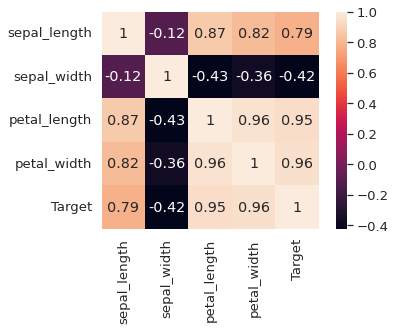

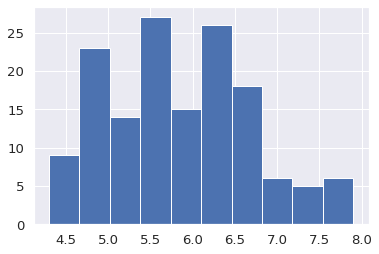

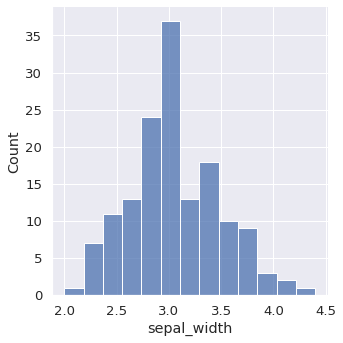

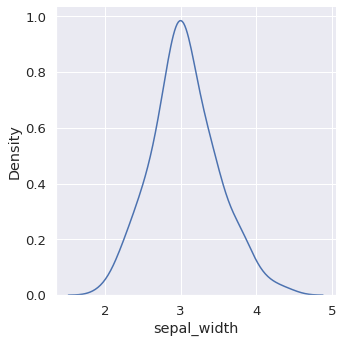

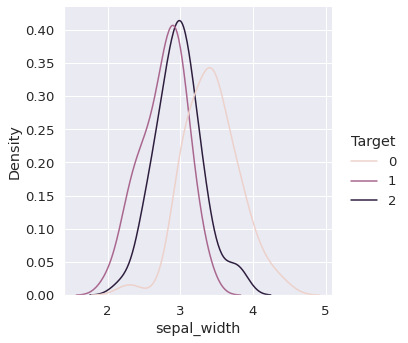

"\nfor col in ['sepal_ width', 'petal_length', 'petal_width']:\n    sns.displot(x=col, hue='Target', kind='kde', data=df)\nplt.show()\n"

In [18]:
import pandas as pd
import numpy as np

from sklearn import datasets
iris=datasets.load_iris()

iris.keys()
print("데이터셋 크기: ",iris['target'].shape)

print('데이터셋 내용: \n',iris['target'])

print('데이터셋 크기:',iris['data'].shape)
print("데이터셋 내용:\n",iris['data'][:7,:])

df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
print('데이터프레임의 형태:',df.shape)
df.head()

df.columns=['sepal_length','sepal_width','petal_length','petal_width']
df.head(2)

df['Target']=iris['target']
print('데이터셋의 크기:',df.shape)
df.head()

df.info()

df.describe()
df.isnull().sum()
df.duplicated().sum()
df.loc[df.duplicated(),:]

df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]
df=df.drop_duplicates()
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]
df.corr()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

sns.heatmap(data=df.corr(),square=True, annot=True, cbar=True)
plt.show()
df['Target'].value_counts()
plt.hist(x='sepal_length', data=df)
plt.show()

sns.displot(x='sepal_width',kind='hist', data=df)
plt.show()

sns.displot(x='sepal_width',kind='kde', data=df)
plt.show()

sns.displot(x='sepal_width',hue='Target',kind='kde', data=df)
plt.show()
'''
for col in ['sepal_ width', 'petal_length', 'petal_width']:
    sns.displot(x=col, hue='Target', kind='kde', data=df)
plt.show()
'''

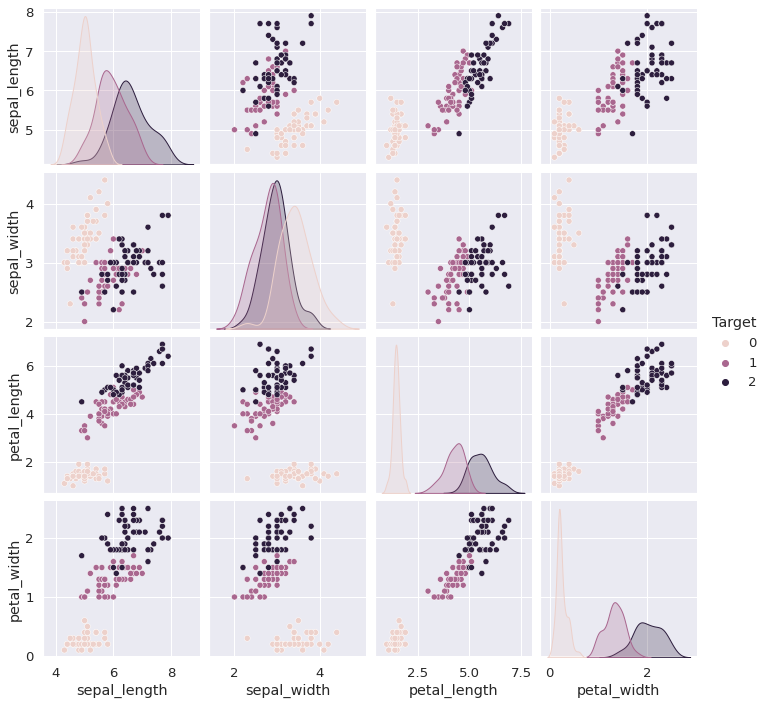

In [25]:
#두 변수 간의 관계
sns.pairplot(df,hue='Target', height=2.5, diag_kind='kde')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split

X_data=df.loc[:,'sepal_length':'petal_width']
y_data=df.loc[:,'Target']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_knn_pred=knn.predict(X_test)
print('예측값: ',y_knn_pred[:5])

from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(y_test, y_knn_pred)
print("Accuracy: %.4f" %knn_acc)



예측값:  [0 1 1 2 1]
Accuracy: 0.9667


In [30]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train, y_train)

y_svc_pred=svc.predict(X_test)
print('예측값: ',y_svc_pred[:5])
svc_acc=accuracy_score(y_test, y_svc_pred)
print('Accuracy: %.4f'%svc_acc)

예측값:  [0 1 1 2 1]
Accuracy: 1.0000


In [32]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(X_train,y_train)

y_lrc_pred=lrc.predict(X_test)
print('예측값: ',y_lrc_pred[:5])

lrc_acc=accuracy_score(y_test, y_lrc_pred)
print('Accuracy: %.4f'%lrc_acc)

예측값:  [0 1 1 2 1]
Accuracy: 1.0000


In [33]:
y_lrc_prob=lrc.predict_proba(X_test)
y_lrc_prob

array([[9.83094486e-01, 1.69054561e-02, 5.76311710e-08],
       [4.60693069e-03, 8.41461542e-01, 1.53931527e-01],
       [1.03676263e-02, 9.20150923e-01, 6.94814504e-02],
       [2.57653286e-05, 5.16405458e-02, 9.48333689e-01],
       [2.39285321e-02, 9.52024719e-01, 2.40467487e-02],
       [2.93670995e-02, 9.25895394e-01, 4.47375065e-02],
       [4.78583033e-06, 1.77674944e-02, 9.82227720e-01],
       [9.80412686e-01, 1.95872007e-02, 1.13568066e-07],
       [1.22345693e-05, 6.66997896e-02, 9.33287976e-01],
       [9.75407022e-01, 2.45929136e-02, 6.41393616e-08],
       [2.73400370e-05, 2.71294883e-02, 9.72843172e-01],
       [1.71532350e-03, 7.49889659e-01, 2.48395017e-01],
       [7.53093521e-04, 4.91872227e-01, 5.07374680e-01],
       [9.84534691e-01, 1.54652804e-02, 2.81281414e-08],
       [9.76954376e-01, 2.30455599e-02, 6.38303698e-08],
       [1.28090924e-03, 2.60490311e-01, 7.38228779e-01],
       [9.91798218e-01, 8.20177033e-03, 1.12007812e-08],
       [4.15678681e-03, 8.61228

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=3, random_state=20)
dtc.fit(X_train,y_train)

y_dtc_pred=dtc.predict(X_test)
print('예측값: ',y_dtc_pred[:5])
dtc_acc=accuracy_score(y_test,y_dtc_pred)
print('Accuracy: %.4f'%dtc_acc)

예측값:  [0 1 1 2 1]
Accuracy: 0.9333


In [36]:
from sklearn.ensemble import VotingClassifier
hvc=VotingClassifier(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)],voting='hard')
hvc.fit(X_train,y_train)

y_hvc_pred=hvc.predict(X_test)
print('예측값: ',y_hvc_pred[:5])

hvc_acc=accuracy_score(y_test, y_hvc_pred)
print('Accuracy: %.4f'%hvc_acc)

예측값:  [0 1 1 2 1]
Accuracy: 1.0000


In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rfc.fit(X_train,y_train)

y_rfc_pred=rfc.predict(X_test)
print('예측값: ',y_rfc_pred[:5])

rfc_acc=accuracy_score(y_test, y_rfc_pred)
print('Accuracy: %.4f' %rfc_acc)

예측값:  [0 1 1 2 1]
Accuracy: 0.9667


In [40]:
X_tr, X_val, y_tr, y_val=train_test_split(X_train, y_train,
                                          test_size=0.3,
                                          shuffle=True,
                                          random_state=20)
print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(83, 4) (83,)
(36, 4) (36,)


In [42]:
rfc=RandomForestClassifier(max_depth=3, random_state=20)
rfc.fit(X_tr, y_tr)

y_tr_pred=rfc.predict(X_tr)
y_val_pred=rfc.predict(X_val)

tr_acc=accuracy_score(y_tr, y_tr_pred)
val_acc=accuracy_score(y_val, y_val_pred)
print('Train Accuracy: %.4f'%tr_acc)
print('Validation Accuracy: %.4f'%val_acc)

y_test_pred=rfc.predict(X_test)
test_acc=accuracy_score(y_test,y_test_pred)
print('Test Accuracy:%.4f'%test_acc)


Train Accuracy: 0.9880
Validation Accuracy: 0.9167
Test Accuracy:0.9000
